In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import time
from sklearn.ensemble import RandomForestRegressor

# *1. Visão Geral*

In [60]:
base_imoveis = pd.read_csv("base_tratada_imoveis_zap_belo_horizonte.csv", sep = ";")
base_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6885 entries, 0 to 6884
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   preco              6885 non-null   float64
 1   tamanho (m²)       6885 non-null   float64
 2   qtd_quartos        6885 non-null   int64  
 3   qtd_banheiros      6885 non-null   float64
 4   qtd_vagas_garagem  6885 non-null   int64  
 5   bairro             6885 non-null   object 
 6   endereco           6885 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 376.6+ KB


In [61]:
round(base_imoveis.describe(),2)

,preco,tamanho (m²),qtd_quartos,qtd_banheiros,qtd_vagas_garagem
count,6885.00,6885.00,6885.00,6885.00,6885.00
mean,1107011.39,112.59,2.93,2.39,2.00
std,759315.94,60.28,0.83,1.03,0.95
min,140000.00,10.00,1.00,1.00,0.00
25%,600000.00,70.00,2.00,2.00,1.00
50%,870000.00,97.00,3.00,2.00,2.00
75%,1350300.00,140.00,4.00,3.00,2.00
max,5000000.00,600.00,7.00,7.00,6.00


# *2. Análise Exploratória dos Dados*

## *2.1. Correlação e Associação das variáveis numéricas*  

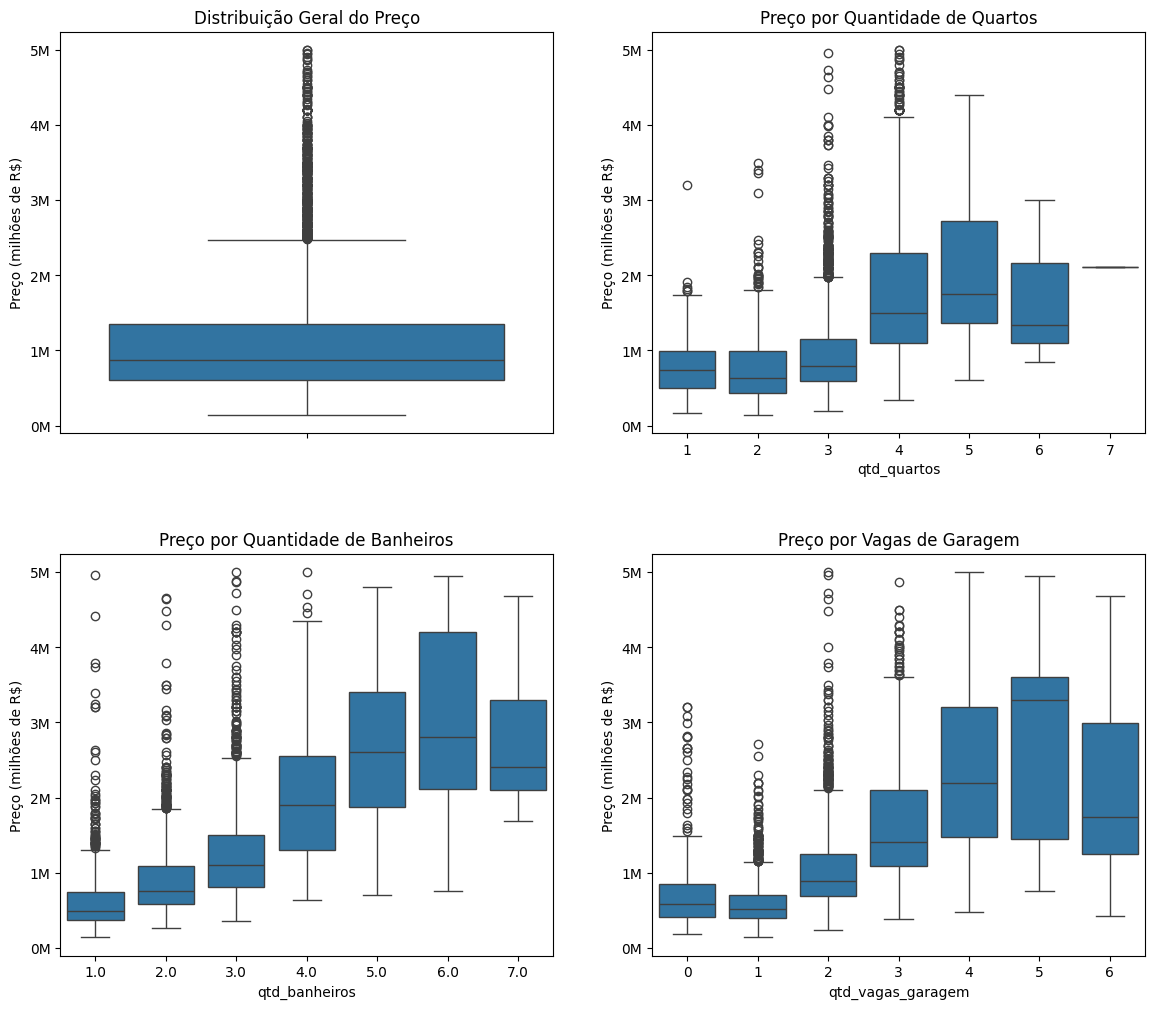

In [62]:
# Função para formatar em milhões
def milhares_formatter(y, pos):
    return f'{int(y / 1_000_000)}M'

formatter = FuncFormatter(milhares_formatter)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

sns.boxplot(data=base_imoveis, y='preco', ax=axes[0, 0])
axes[0, 0].yaxis.set_major_formatter(formatter)
axes[0, 0].set_ylabel('Preço (milhões de R$)')
axes[0, 0].set_title('Distribuição Geral do Preço')

sns.boxplot(data=base_imoveis, x='qtd_quartos', y='preco', ax=axes[0, 1])
axes[0, 1].yaxis.set_major_formatter(formatter)
axes[0, 1].set_ylabel('Preço (milhões de R$)')
axes[0, 1].set_title('Preço por Quantidade de Quartos')

sns.boxplot(data=base_imoveis, x='qtd_banheiros', y='preco', ax=axes[1, 0])
axes[1, 0].yaxis.set_major_formatter(formatter)
axes[1, 0].set_ylabel('Preço (milhões de R$)')
axes[1, 0].set_title('Preço por Quantidade de Banheiros')

sns.boxplot(data=base_imoveis, x='qtd_vagas_garagem', y='preco', ax=axes[1, 1])
axes[1, 1].yaxis.set_major_formatter(formatter)
axes[1, 1].set_ylabel('Preço (milhões de R$)')
axes[1, 1].set_title('Preço por Vagas de Garagem')

plt.show()


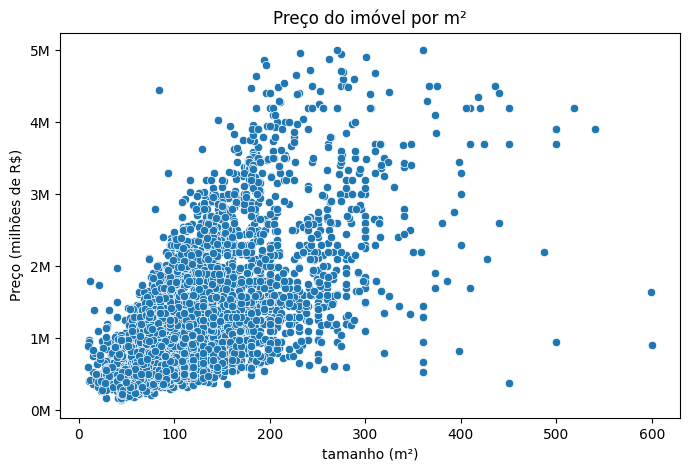

In [63]:
#Gráfico de dispersão preço e tamanho do imóvel
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(base_imoveis,x='tamanho (m²)',y='preco',ax=ax)
plt.title("Preço do imóvel por m²")

#Corrigindo unidade
formatter1 = FuncFormatter(milhares_formatter)

ax.yaxis.set_major_formatter(formatter1)
ax.set_ylabel('Preço (milhões de R$)')


plt.show()

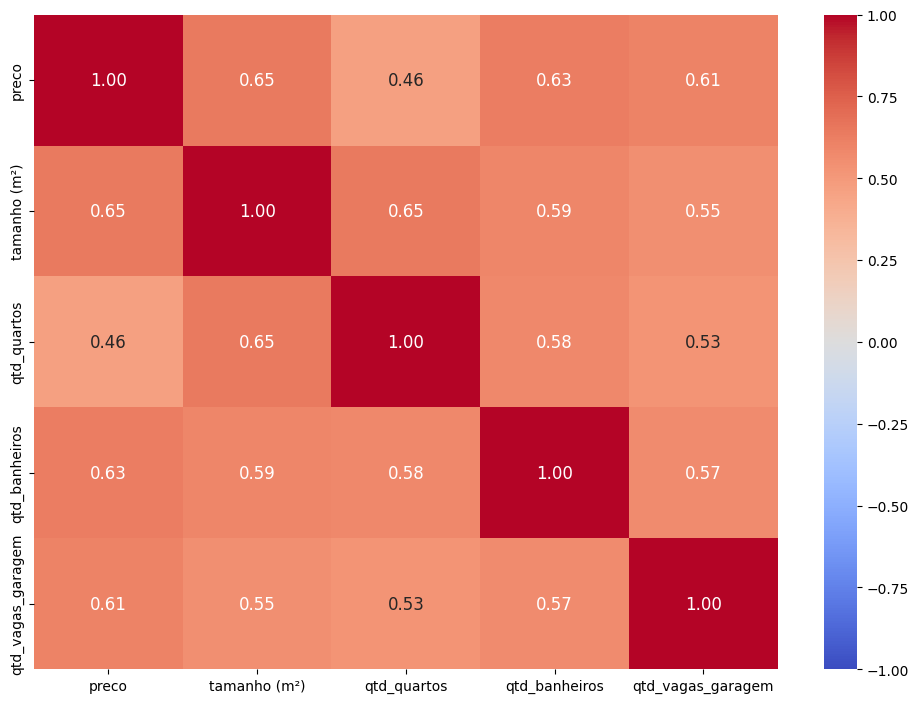

In [64]:
plt.figure(figsize=(12, 8.5))
sns.heatmap(
    base_imoveis.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    annot_kws={"size": 12},  
    vmax=1, vmin=-1,
    cmap='coolwarm')
plt.show()

## *2.2. Correlação e Associação das variáveis categóricas*  

In [65]:
#Tabela de frequência para os bairros
tab_freq_bairros = base_imoveis['bairro'].value_counts().reset_index()
tab_freq_bairros.columns = ['Bairro','Freq.Absoluta']
tab_freq_bairros['Freq.Relativa (%)'] = round(100*(tab_freq_bairros['Freq.Absoluta']/tab_freq_bairros['Freq.Absoluta'].sum()),2)
tab_freq_bairros['Freq.Acumulada (%)'] =  tab_freq_bairros['Freq.Relativa (%)'].cumsum()
tab_freq_bairros.head(15)

,Bairro,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Buritis,462,6.71,6.71
1,Lourdes,320,4.65,11.36
2,Santo Antônio,306,4.44,15.80
3,Serra,274,3.98,19.78
4,Castelo,249,3.62,23.40
5,Sion,228,3.31,26.71
6,Funcionários,191,2.77,29.48
7,Savassi,188,2.73,32.21
8,Santo Agostinho,164,2.38,34.59
9,Santa Mônica,154,2.24,36.83


In [66]:
#Mostra as 15 primeiras linhas de tab_freq_bairros em que a coluna Freq.Absoluta tem valor maior que 10
tab_freq_bairros[tab_freq_bairros['Freq.Absoluta'] > 10].head(15)

,Bairro,Freq.Absoluta,Freq.Relativa (%),Freq.Acumulada (%)
0,Buritis,462,6.71,6.71
1,Lourdes,320,4.65,11.36
2,Santo Antônio,306,4.44,15.80
3,Serra,274,3.98,19.78
4,Castelo,249,3.62,23.40
5,Sion,228,3.31,26.71
6,Funcionários,191,2.77,29.48
7,Savassi,188,2.73,32.21
8,Santo Agostinho,164,2.38,34.59
9,Santa Mônica,154,2.24,36.83


In [67]:
analise_por_bairro = base_imoveis.groupby('bairro')['preco'].agg(['mean','median','count', 'std']).sort_values('median', ascending=False)

# Renomeia as colunas para ficar mais claro
analise_por_bairro = analise_por_bairro.rename(columns={
    "mean": "preco_medio",
    "median": "preco_mediano",
    "count": "qtd_imoveis",
    "std": "dispersao_precos"
})

#Ordenando valores em ordem descrescente para preço médio
analise_por_bairro = analise_por_bairro.sort_values(by=["preco_medio","qtd_imoveis"], ascending=[False,False])


#Facilitando a leitura
colunas_de_preco = ["preco_medio","preco_mediano", "dispersao_precos"]
for coluna in colunas_de_preco:
    analise_por_bairro[coluna] = analise_por_bairro[coluna].map('R$ {:,.2f}'.format, na_action='ignore')

In [68]:
#Apresentaremos apenas os 15 primeiros bairros que possuem pelo menos mais de 10 observações
analise_por_bairro[analise_por_bairro["qtd_imoveis"] > 10].head(15)

,preco_medio,preco_mediano,qtd_imoveis,dispersao_precos
bairro,,,,
Belvedere,"R$ 2,605,678.37","R$ 2,500,000.00",73,"R$ 1,299,718.87"
Lourdes,"R$ 1,856,744.51","R$ 1,507,500.00",320,"R$ 977,180.63"
Santa Lúcia,"R$ 1,850,886.40","R$ 1,785,000.00",80,"R$ 936,191.69"
Santo Agostinho,"R$ 1,776,881.26","R$ 1,468,647.50",164,"R$ 924,804.24"
Funcionários,"R$ 1,744,082.22","R$ 1,500,000.00",191,"R$ 928,057.91"
Savassi,"R$ 1,741,616.48","R$ 1,546,350.00",188,"R$ 879,413.14"
Gutierrez,"R$ 1,721,329.24","R$ 1,450,000.00",151,"R$ 958,657.69"
Anchieta,"R$ 1,606,791.49","R$ 1,400,000.00",105,"R$ 875,384.64"
Carmo,"R$ 1,564,897.57","R$ 1,450,000.00",68,"R$ 705,550.12"


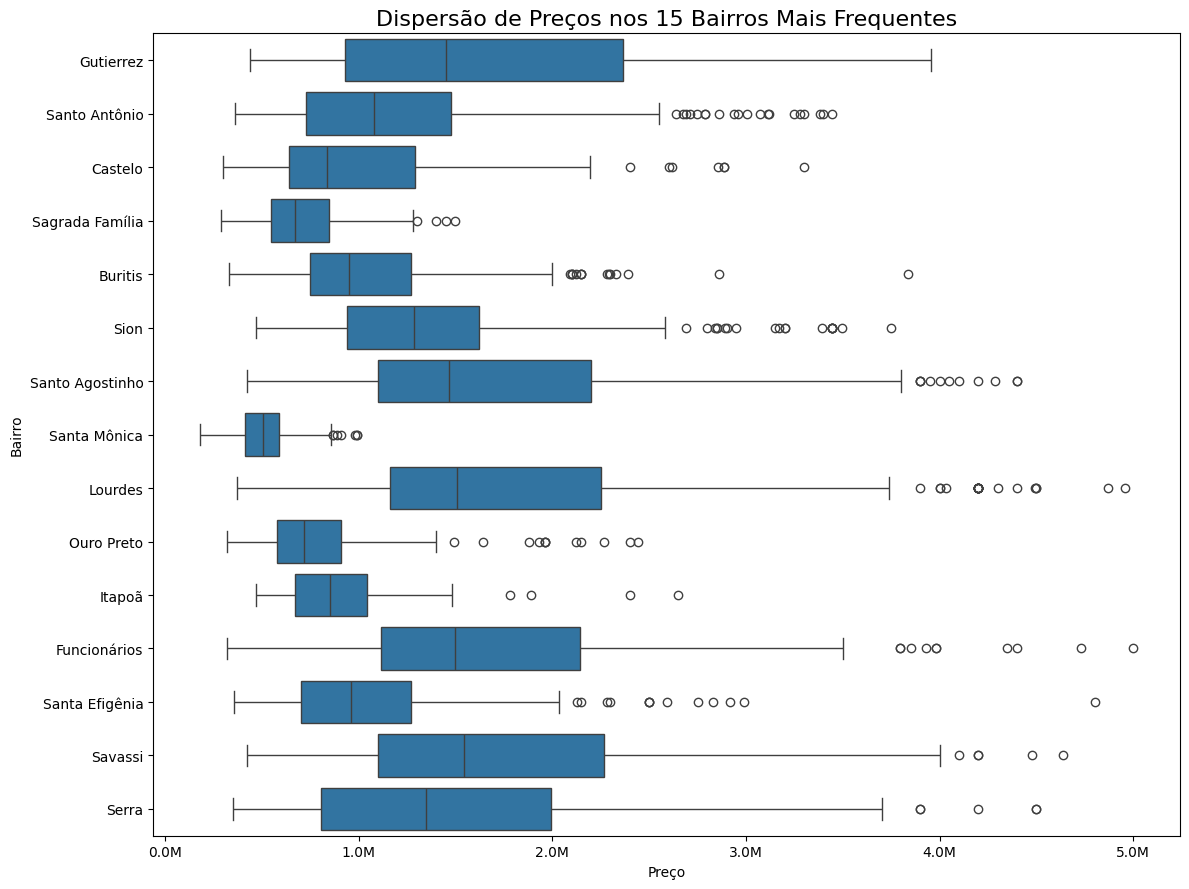

In [69]:
top_bairros = base_imoveis['bairro'].value_counts().nlargest(15).index
df_para_plot = base_imoveis[base_imoveis['bairro'].isin(top_bairros)]

fig, ax = plt.subplots(figsize=(12, 9)) 
sns.boxplot(
    data=df_para_plot, 
    x='preco', 
    y='bairro', 
    ax=ax)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

ax.set_title('Dispersão de Preços nos 15 Bairros Mais Frequentes', fontsize=16)
ax.set_xlabel('Preço')
ax.set_ylabel('Bairro')

plt.tight_layout()

plt.show()

# Ajustando ordem dos bairros para futura etapa dos modelos preditivos

In [70]:
contagem_bairros = base_imoveis['bairro'].value_counts()

In [71]:
# Considera bairros com ao menos 10 imóveis
bairros_comuns = contagem_bairros[contagem_bairros >= 10].index

In [72]:
# Cria coluna de bairro tratado
base_imoveis['bairro_tratada'] = base_imoveis['bairro'].apply(lambda x: x if x in bairros_comuns else 'Outros')


In [73]:
precos_medios = base_imoveis.groupby("bairro_tratada")["preco"].mean()

In [74]:
bairro_mais_barato = precos_medios.idxmin()
preco_mais_barato = precos_medios.min()

print(f"O bairro com menor preço médio é '{bairro_mais_barato}' com preço médio de R$ {preco_mais_barato:,.2f}")


O bairro com menor preço médio é 'Jardim Leblon' com preço médio de R$ 352,204.17


In [75]:
base_imoveis['bairro_mais_barato'] = (base_imoveis['bairro_tratada'] == bairro_mais_barato).astype(int)


In [76]:
todos_os_bairros = list(base_imoveis['bairro_tratada'].unique())
if bairro_mais_barato in todos_os_bairros:
    todos_os_bairros.remove(bairro_mais_barato)

ordem_bairro_mais_barato_em_primeiro = [bairro_mais_barato] + todos_os_bairros

base_imoveis['bairro_tratada'] = pd.Categorical(
    base_imoveis['bairro_tratada'],
    categories=ordem_bairro_mais_barato_em_primeiro,
    ordered=True
)

In [77]:
base_imoveis.to_csv("imoveis_ML_belo_horizonte.csv", index=False, sep=";", encoding="utf-8-sig")